## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 176s 1us/step


In [13]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

print(x_train.shape,x_train[0].shape)

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))
print(x_train.shape,x_train[0].shape)

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

(50000, 32, 32, 3) (32, 32, 3)
(50000, 3072) (3072,)


In [6]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
Compile 模型
"""

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=64, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 8s 167us/step - loss: 2.1545 - accuracy: 0.2380 - val_loss: 2.0461 - val_accuracy: 0.2943
Epoch 2/500
50000/50000 [==============================] - 8s 152us/step - loss: 1.9875 - accuracy: 0.3113 - val_loss: 1.9434 - val_accuracy: 0.3272
Epoch 3/500
50000/50000 [==============================] - 8s 154us/step - loss: 1.9100 - accuracy: 0.3327 - val_loss: 1.8925 - val_accuracy: 0.3401
Epoch 4/500
50000/50000 [==============================] - 8s 155us/step - loss: 1.8632 - accuracy: 0.3493 - val_loss: 1.8450 - val_accuracy: 0.3560
Epoch 5/500
50000/50000 [==============================] - 8s 155us/step - loss: 1.8290 - accuracy: 0.3623 - val_loss: 1.8223 - val_accuracy: 0.3592
Epoch 6/500
50000/50000 [==============================] - 8s 155us/step - loss: 1.8027 - accuracy: 0.3703 - val_loss: 1.7901 - val_accuracy: 0.3766
Epoch 7/500
50000/50000 [==============================

50000/50000 [==============================] - 7s 141us/step - loss: 1.3753 - accuracy: 0.5165 - val_loss: 1.4407 - val_accuracy: 0.4845
Epoch 55/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.3709 - accuracy: 0.5191 - val_loss: 1.4712 - val_accuracy: 0.4717
Epoch 56/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.3654 - accuracy: 0.5216 - val_loss: 1.4427 - val_accuracy: 0.4900
Epoch 57/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.3612 - accuracy: 0.5224 - val_loss: 1.4322 - val_accuracy: 0.4929
Epoch 58/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.3558 - accuracy: 0.5243 - val_loss: 1.4481 - val_accuracy: 0.4788
Epoch 59/500
50000/50000 [==============================] - 8s 153us/step - loss: 1.3502 - accuracy: 0.5265 - val_loss: 1.4294 - val_accuracy: 0.4929
Epoch 60/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.3460 - accuracy: 0.5276 - val

50000/50000 [==============================] - 7s 140us/step - loss: 1.1497 - accuracy: 0.5970 - val_loss: 1.3697 - val_accuracy: 0.5123
Epoch 109/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.1453 - accuracy: 0.5982 - val_loss: 1.3999 - val_accuracy: 0.5036
Epoch 110/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.1431 - accuracy: 0.5972 - val_loss: 1.3903 - val_accuracy: 0.5088
Epoch 111/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.1388 - accuracy: 0.6002 - val_loss: 1.3445 - val_accuracy: 0.5252
Epoch 112/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.1346 - accuracy: 0.6016 - val_loss: 1.3724 - val_accuracy: 0.5161
Epoch 113/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.1306 - accuracy: 0.6026 - val_loss: 1.4479 - val_accuracy: 0.4937
Epoch 114/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.1261 - accuracy: 0.6047

50000/50000 [==============================] - 8s 154us/step - loss: 0.9596 - accuracy: 0.6651 - val_loss: 1.3878 - val_accuracy: 0.5151
Epoch 163/500
50000/50000 [==============================] - 8s 155us/step - loss: 0.9567 - accuracy: 0.6642 - val_loss: 1.3416 - val_accuracy: 0.5360
Epoch 164/500
50000/50000 [==============================] - 8s 163us/step - loss: 0.9543 - accuracy: 0.6654 - val_loss: 1.3596 - val_accuracy: 0.5297
Epoch 165/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.9525 - accuracy: 0.6683 - val_loss: 1.4890 - val_accuracy: 0.4943
Epoch 166/500
50000/50000 [==============================] - 8s 169us/step - loss: 0.9434 - accuracy: 0.6714 - val_loss: 1.3883 - val_accuracy: 0.5209
Epoch 167/500
50000/50000 [==============================] - 8s 155us/step - loss: 0.9412 - accuracy: 0.6719 - val_loss: 1.4840 - val_accuracy: 0.4984
Epoch 168/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.9393 - accuracy: 0.6726

50000/50000 [==============================] - 7s 144us/step - loss: 0.7848 - accuracy: 0.7295 - val_loss: 1.6166 - val_accuracy: 0.4850
Epoch 217/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.7783 - accuracy: 0.7320 - val_loss: 1.4813 - val_accuracy: 0.5085
Epoch 218/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.7810 - accuracy: 0.7304 - val_loss: 1.6898 - val_accuracy: 0.4780
Epoch 219/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.7773 - accuracy: 0.7291 - val_loss: 1.6678 - val_accuracy: 0.4879
Epoch 220/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.7708 - accuracy: 0.7337 - val_loss: 1.5981 - val_accuracy: 0.4929
Epoch 221/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.7662 - accuracy: 0.7359 - val_loss: 1.6144 - val_accuracy: 0.4870
Epoch 222/500
50000/50000 [==============================] - 7s 141us/step - loss: 0.7647 - accuracy: 0.7376

50000/50000 [==============================] - 8s 152us/step - loss: 0.6197 - accuracy: 0.7886 - val_loss: 1.6227 - val_accuracy: 0.5111
Epoch 271/500
50000/50000 [==============================] - 8s 152us/step - loss: 0.6197 - accuracy: 0.7889 - val_loss: 1.7359 - val_accuracy: 0.4892
Epoch 272/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.6122 - accuracy: 0.7938 - val_loss: 1.5988 - val_accuracy: 0.5218
Epoch 273/500
50000/50000 [==============================] - 8s 154us/step - loss: 0.6128 - accuracy: 0.7916 - val_loss: 1.6576 - val_accuracy: 0.5100
Epoch 274/500
50000/50000 [==============================] - 8s 152us/step - loss: 0.6009 - accuracy: 0.7964 - val_loss: 1.5198 - val_accuracy: 0.5314
Epoch 275/500
50000/50000 [==============================] - 8s 156us/step - loss: 0.6102 - accuracy: 0.7928 - val_loss: 1.6900 - val_accuracy: 0.5033
Epoch 276/500
50000/50000 [==============================] - 8s 161us/step - loss: 0.6046 - accuracy: 0.7942

50000/50000 [==============================] - 7s 147us/step - loss: 0.4666 - accuracy: 0.8444 - val_loss: 1.6906 - val_accuracy: 0.5292
Epoch 325/500
50000/50000 [==============================] - 7s 149us/step - loss: 0.4684 - accuracy: 0.8447 - val_loss: 1.7828 - val_accuracy: 0.5122
Epoch 326/500
50000/50000 [==============================] - 7s 145us/step - loss: 0.4708 - accuracy: 0.8452 - val_loss: 1.9744 - val_accuracy: 0.4935
Epoch 327/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.4680 - accuracy: 0.8462 - val_loss: 1.9812 - val_accuracy: 0.4891
Epoch 328/500
50000/50000 [==============================] - 8s 151us/step - loss: 0.4618 - accuracy: 0.8471 - val_loss: 1.7723 - val_accuracy: 0.5223
Epoch 329/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.4664 - accuracy: 0.8464 - val_loss: 3.0574 - val_accuracy: 0.3870
Epoch 330/500
50000/50000 [==============================] - 8s 156us/step - loss: 0.4548 - accuracy: 0.8495

50000/50000 [==============================] - 9s 184us/step - loss: 0.3427 - accuracy: 0.8924 - val_loss: 2.0288 - val_accuracy: 0.5070
Epoch 379/500
50000/50000 [==============================] - 8s 164us/step - loss: 0.3406 - accuracy: 0.8942 - val_loss: 1.9994 - val_accuracy: 0.5178
Epoch 380/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.3349 - accuracy: 0.8963 - val_loss: 2.0641 - val_accuracy: 0.5126
Epoch 381/500
50000/50000 [==============================] - 8s 159us/step - loss: 0.3464 - accuracy: 0.8959 - val_loss: 1.8278 - val_accuracy: 0.5343
Epoch 382/500
50000/50000 [==============================] - 8s 160us/step - loss: 0.3240 - accuracy: 0.8998 - val_loss: 1.9175 - val_accuracy: 0.5222
Epoch 383/500
50000/50000 [==============================] - 8s 155us/step - loss: 0.3310 - accuracy: 0.8970 - val_loss: 2.1150 - val_accuracy: 0.4964
Epoch 384/500
50000/50000 [==============================] - 8s 158us/step - loss: 0.3308 - accuracy: 0.8973

50000/50000 [==============================] - 8s 157us/step - loss: 0.2320 - accuracy: 0.9346 - val_loss: 2.3209 - val_accuracy: 0.4969
Epoch 433/500
50000/50000 [==============================] - 8s 153us/step - loss: 0.2606 - accuracy: 0.9287 - val_loss: 2.0831 - val_accuracy: 0.5282
Epoch 434/500
50000/50000 [==============================] - 8s 155us/step - loss: 0.2259 - accuracy: 0.9368 - val_loss: 2.0870 - val_accuracy: 0.5246
Epoch 435/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.2256 - accuracy: 0.9376 - val_loss: 2.3831 - val_accuracy: 0.4998
Epoch 436/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.2271 - accuracy: 0.9373 - val_loss: 2.2996 - val_accuracy: 0.5123
Epoch 437/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.2480 - accuracy: 0.9300 - val_loss: 2.5342 - val_accuracy: 0.4783
Epoch 438/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.2336 - accuracy: 0.9354

50000/50000 [==============================] - 8s 158us/step - loss: 0.1724 - accuracy: 0.9584 - val_loss: 2.3174 - val_accuracy: 0.5321
Epoch 487/500
50000/50000 [==============================] - 8s 156us/step - loss: 0.1510 - accuracy: 0.9629 - val_loss: 2.4984 - val_accuracy: 0.5110
Epoch 488/500
50000/50000 [==============================] - 8s 158us/step - loss: 0.1881 - accuracy: 0.9551 - val_loss: 3.9562 - val_accuracy: 0.4459
Epoch 489/500
50000/50000 [==============================] - 8s 155us/step - loss: 0.1661 - accuracy: 0.9597 - val_loss: 2.6691 - val_accuracy: 0.4984
Epoch 490/500
50000/50000 [==============================] - 8s 155us/step - loss: 0.1378 - accuracy: 0.9659 - val_loss: 3.2210 - val_accuracy: 0.4414
Epoch 491/500
50000/50000 [==============================] - 8s 157us/step - loss: 0.1432 - accuracy: 0.9657 - val_loss: 2.3393 - val_accuracy: 0.5252
Epoch 492/500
50000/50000 [==============================] - 8s 156us/step - loss: 0.1493 - accuracy: 0.9660

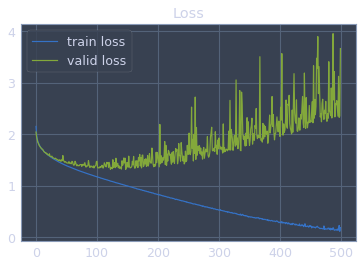

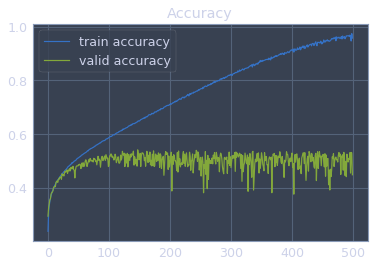

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [15]:
!jupyter nbconvert --to html Day_077_HW.ipynb Day_077_overfitting.ipynb

[NbConvertApp] Converting notebook Day_077_HW.ipynb to html
[NbConvertApp] Writing 494750 bytes to Day_077_HW.html
[NbConvertApp] Converting notebook Day_077_overfitting.ipynb to html
[NbConvertApp] Writing 415107 bytes to Day_077_overfitting.html
